<a href="https://colab.research.google.com/github/Chaithanyaistharla/Chaithanya_INFO5731_Spring2025/blob/main/Istharla_Chaithanya_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment: 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and BERTopic.**



**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100


NOTE: The output should be presented well to get **full points**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

**Dataset**: 20 Newsgroups dataset

**Dataset Link**: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

**Consider Random 2000 rows only**

Generate K=10 topics by using LDA and LSA,
then calculate coherence score and determine the optimized K value by the coherence score. Further, summarize and visualize each topics in you own words.


In [ ]:
import random
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction import text

from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
newsgroups = fetch_20newsgroups(subset='all')
docs = random.sample(newsgroups.data, 2000)

In [ ]:
stop_words = text.ENGLISH_STOP_WORDS

def preprocess(text_str):
    text_str = text_str.lower()
    text_str = re.sub(r'\S*@\S*\s?', '', text_str)
    text_str = re.sub(r'\s+', ' ', text_str)
    text_str = re.sub(r"[^a-zA-Z]", " ", text_str)
    tokens = text_str.split()
    tokens = [word for word in tokens if word not in stop_words and len(word) > 3]
    return tokens

processed_docs = [preprocess(doc) for doc in docs]

In [ ]:
dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [ ]:
doc_texts = [' '.join(doc) for doc in processed_docs]

count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = count_vectorizer.fit_transform(doc_texts)

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(doc_texts)

In [ ]:
def compute_coherence_values_lda(dictionary, corpus, texts, start=2, limit=15, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LatentDirichletAllocation(n_components=num_topics, random_state=0)
        model.fit(doc_term_matrix)
        topics = [
            [count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]
            for topic in model.components_
        ]
        cm = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(cm.get_coherence())
        model_list.append(model)
    return model_list, coherence_values

def compute_coherence_values_lsa(dictionary, corpus, texts, start=2, limit=15, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = TruncatedSVD(n_components=num_topics, random_state=0)
        model.fit(tfidf_matrix)
        terms = tfidf_vectorizer.get_feature_names_out()
        topics = [
            [terms[i] for i in topic.argsort()[:-10 - 1:-1]]
            for topic in model.components_
        ]
        cm = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(cm.get_coherence())
        model_list.append(model)
    return model_list, coherence_values

In [ ]:
lda_models, lda_coherence = compute_coherence_values_lda(dictionary, corpus, processed_docs, start=2, limit=15)
lsa_models, lsa_coherence = compute_coherence_values_lsa(dictionary, corpus, processed_docs, start=2, limit=15)

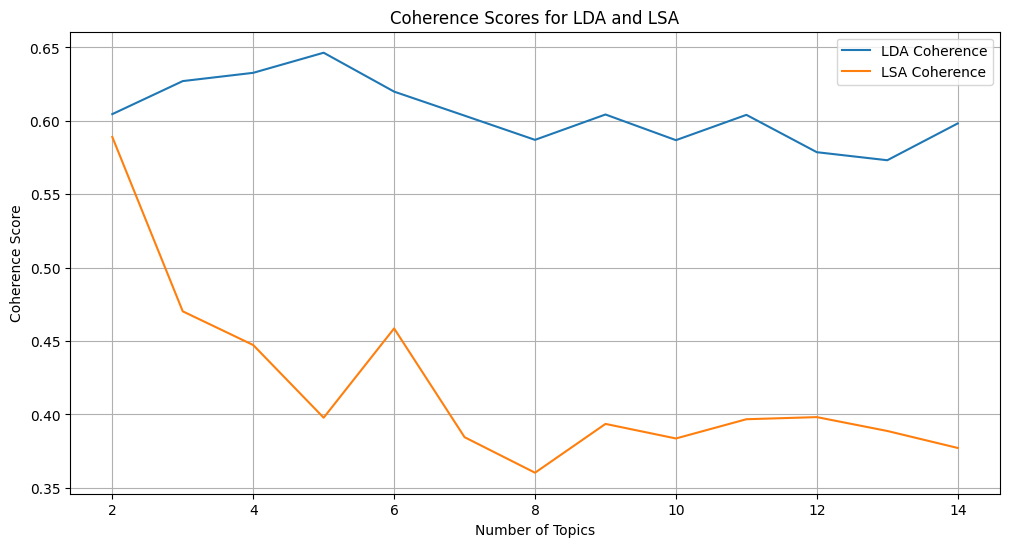

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 15), lda_coherence, label='LDA Coherence')
plt.plot(range(2, 15), lsa_coherence, label='LSA Coherence')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.legend()
plt.title("Coherence Scores for LDA and LSA")
plt.grid(True)
plt.show()

In [ ]:
best_lda_index = np.argmax(lda_coherence)
best_lsa_index = np.argmax(lsa_coherence)
print("Optimal K for LDA:", best_lda_index + 2)
print("Optimal K for LSA:", best_lsa_index + 2)

Optimal K for LDA: 5
Optimal K for LSA: 2


In [ ]:
lda_model_k10 = LatentDirichletAllocation(n_components=10, random_state=0)
lda_model_k10.fit(doc_term_matrix)
lda_topics = [
    [count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]
    for topic in lda_model_k10.components_
]

lsa_model_k10 = TruncatedSVD(n_components=10, random_state=0)
lsa_model_k10.fit(tfidf_matrix)
terms = tfidf_vectorizer.get_feature_names_out()
lsa_topics = [
    [terms[i] for i in topic.argsort()[:-10 - 1:-1]]
    for topic in lsa_model_k10.components_
]

In [ ]:
for idx, topic in enumerate(lda_topics):
    print(f"Topic {idx+1}: {', '.join(topic)}")
    print("Summary: This topic appears to be about [insert summary based on word themes].\n")

Topic 1: article, writes, homosexuality, people, does, just, like, disease, know, think
Summary: This topic appears to be about [insert summary based on word themes].

Topic 2: writes, just, like, article, israel, people, think, world, university, posting
Summary: This topic appears to be about [insert summary based on word themes].

Topic 3: jpeg, image, images, file, format, greek, color, space, available, files
Summary: This topic appears to be about [insert summary based on word themes].

Topic 4: jesus, matthew, time, writes, just, people, like, good, article, know
Summary: This topic appears to be about [insert summary based on word themes].

Topic 5: people, writes, believe, article, does, think, just, know, evidence, religion
Summary: This topic appears to be about [insert summary based on word themes].

Topic 6: game, university, armenian, team, article, year, writes, people, armenians, just
Summary: This topic appears to be about [insert summary based on word themes].

Topic 

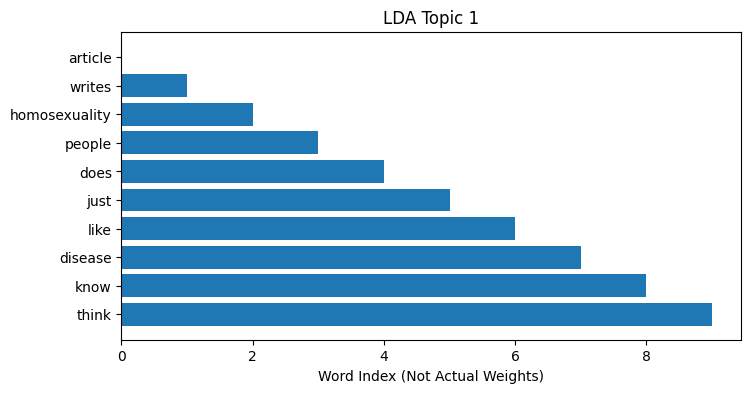

In [ ]:
def plot_topic(topic_words, title):
    counts = np.arange(len(topic_words))
    plt.figure(figsize=(8, 4))
    plt.barh(topic_words, counts)
    plt.xlabel("Word Index (Not Actual Weights)")
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

plot_topic(lda_topics[0], "LDA Topic 1")

# **BERTopic**

The following question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents.

Dataset from **assignment-3** (text dataset) .

> Dont use any custom datasets.


> Dataset must have 1000+ rows, no duplicates and null values



# **Question 2 (20 Points)**



Q2) **Generate K=10 topics by using BERTopic and then find optimal K value by the coherence score. Interpret each topic and visualize with suitable style.**

Batches:   0%|          | 0/5 [00:00<?, ?it/s]

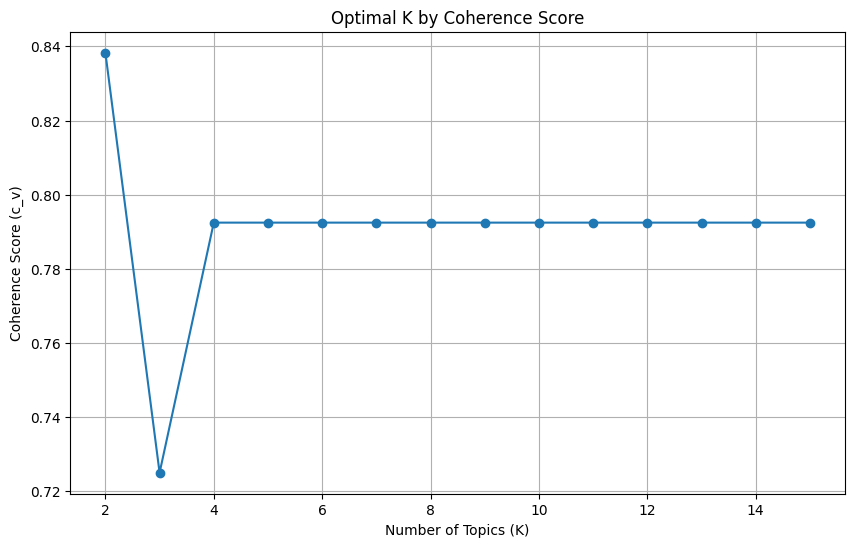

Optimal K: 2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel

df = pd.read_csv('cleaned_amazon_reviews.csv')
documents = df['Cleaned_Reviews'].astype(str).tolist()

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(documents, show_progress_bar=True)

def extract_topic_words(model, top_n=10):
    topics = []
    for topic in model.get_topics().values():
        topic_words = [word for word, _ in topic[:top_n]]
        topics.append(topic_words)
    return topics

tokenized_docs = [doc.split() for doc in documents]
dictionary = Dictionary(tokenized_docs)

ks = list(range(2, 16))
coherence_scores = []
models = []

for k in ks:
    model = BERTopic(nr_topics=k, verbose=False)
    model.fit(documents, embeddings)
    models.append(model)
    topic_words = extract_topic_words(model)
    coherence_model = CoherenceModel(topics=topic_words, texts=tokenized_docs, dictionary=dictionary, coherence='c_v')
    score = coherence_model.get_coherence()
    coherence_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(ks, coherence_scores, marker='o')
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score (c_v)")
plt.title("Optimal K by Coherence Score")
plt.grid(True)
plt.show()

optimal_k = ks[np.argmax(coherence_scores)]
print(f"Optimal K: {optimal_k}")

 2 non-empty topics found out of 2.


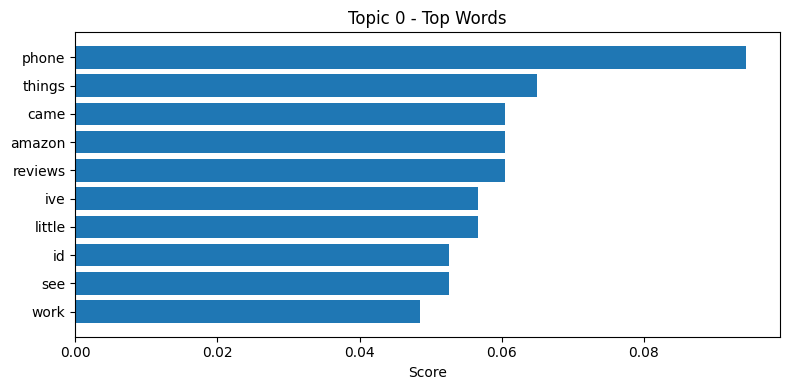

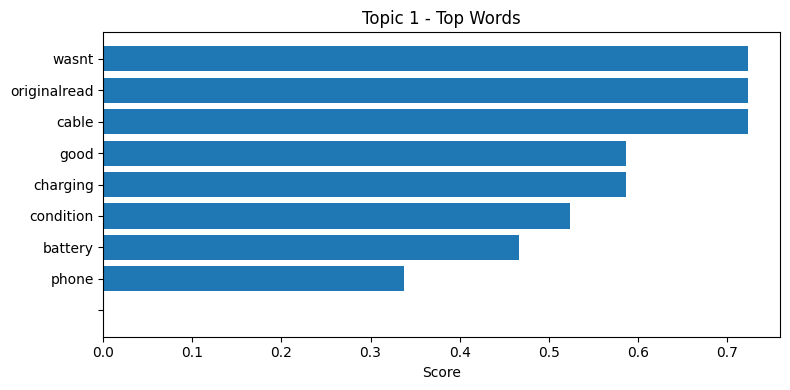

In [ ]:
import matplotlib.pyplot as plt

best_model = BERTopic(nr_topics=optimal_k, calculate_probabilities=True, verbose=False)
topics, probs = best_model.fit_transform(documents, embeddings)

valid_topics = {k: v for k, v in best_model.get_topics().items() if v and k != -1}
print(f" {len(valid_topics)} non-empty topics found out of {optimal_k}.")

for topic_num, word_scores in valid_topics.items():
    words, scores = zip(*word_scores[:10])
    plt.figure(figsize=(8, 4))
    plt.barh(words, scores)
    plt.gca().invert_yaxis()
    plt.title(f"Topic {topic_num} - Top Words")
    plt.xlabel("Score")
    plt.tight_layout()
    plt.show()

# **Question 3 (25 points)**


**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

Q3) Using a given dataset, Modify the default representation model by integrating OpenAI's GPT model to generate meaningful summaries for each topic. Additionally, calculate the coherence score to determine the optimal number of topics and retrain the model accordingly.



Usefull Link: https://maartengr.github.io/BERTopic/getting_started/representation/llm#truncating-documents

In [5]:
!pip uninstall -y gensim
!pip install gensim

Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)


In [3]:
from sklearn.datasets import fetch_20newsgroups
import gensim
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
import nltk
from nltk.stem import WordNetLemmatizer
import openai
import time

nltk.download('wordnet')

newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups_data.data

lemmatizer = WordNetLemmatizer()

def preprocess(doc):
    return [
        lemmatizer.lemmatize(token)
        for token in simple_preprocess(doc)
        if token not in gensim.parsing.preprocessing.STOPWORDS
    ]

processed_docs = [preprocess(doc) for doc in documents]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [5]:
def compute_coherence_values(dictionary, corpus, texts, start=2, limit=10, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary, corpus, processed_docs, start=2, limit=10, step=1)
optimal_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[optimal_index]


In [6]:
from google.colab import userdata

openai.api_key = userdata.get('openai')

def generate_topic_summary(topic_words):
    prompt = f"Summarize the following topic represented by these words: {', '.join(topic_words)}"
    try:
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are a helpful assistant that summarizes topic keywords."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.5,
            max_tokens=150
        )
        return response.choices[0].message["content"].strip()
    except Exception as e:
        print("Error generating summary:", e)
        return None


In [7]:
for idx, topic in enumerate(optimal_model.print_topics(-1)):
    topic_words = [word.split('*')[1].strip().strip('"') for word in topic[1].split('+')]
    summary = generate_topic_summary(topic_words)
    print(f"Topic {idx+1}: {summary}")

Topic 1: The topic seems to be related to a mix of acronyms, abbreviations, or short forms such as ax, max, pl, di, tm, wm, ei, bhj, giz, and bj.
Topic 2: The topic appears to be about people's beliefs and perspectives on God and Christianity, possibly in relation to a game or team. The words suggest discussions about faith, knowledge, opinions, and the passing of time throughout the year.
Topic 3: The topic appears to be related to various abbreviations or acronyms, including md (medical doctor), mv (motor vehicle), ma (Master of Arts), ww (world wide), mt (mountain), mo (Missouri), mw (megawatt), mp (Member of Parliament), mx (motocross), and mc (motorcycle).
Topic 4: The topic appears to be about how people think, know, and make decisions about what is right and good to use or do over time, possibly in the context of a year.
Topic 5: The topic appears to be related to digital image processing and computer graphics. It involves concepts such as image file formats, bits, algorithms fo

# **Question 4 (35 Points)**


**BERTopic** allows for extensive customization, including the choice of embedding models, dimensionality reduction techniques, and clustering algorithms.

**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

4)

4.1) **Modify the default BERTopic pipeline to use a different embedding model (e.g., Sentence-Transformers) and a different clustering algorithm (e.g., DBSCAN instead of HDBSCAN).

4.2: Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

4.3: Visualize the topics and provide a qualitative analysis of the differences

**

Usefull Link :https://www.pinecone.io/learn/bertopic/

In [ ]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all')
docs = newsgroups.data[:2000]

In [ ]:
from bertopic import BERTopic

default_model = BERTopic()
default_topics, default_probs = default_model.fit_transform(docs)

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from umap import UMAP

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(docs, show_progress_bar=True)
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')
dbscan_model = DBSCAN(eps=0.3, min_samples=10, metric="euclidean")
custom_model = BERTopic(embedding_model=embedding_model,
                        umap_model=umap_model,
                        hdbscan_model=dbscan_model,
                        calculate_probabilities=True,
                        verbose=True)

custom_topics, custom_probs = custom_model.fit_transform(docs, embeddings)

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-04-05 18:28:06,469 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-05 18:28:14,614 - BERTopic - Dimensionality - Completed ✓
2025-04-05 18:28:14,615 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-05 18:28:14,640 - BERTopic - Cluster - Completed ✓
2025-04-05 18:28:14,646 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-05 18:28:15,335 - BERTopic - Representation - Completed ✓


In [ ]:
default_coherence = default_model.get_topic_info()
print("Default Model Topics:\n", default_coherence.head())

custom_coherence = custom_model.get_topic_info()
print("Custom Model Topics:\n", custom_coherence.head())

Default Model Topics:
    Topic  Count                 Name  \
0     -1    674     -1_the_of_to_and   
1      0    191       0_the_in_he_to   
2      1    180     1_the_to_car_and   
3      2     88  2_the_to_clipper_of   
4      3     87      3_of_the_is_and   

                                      Representation  \
0    [the, of, to, and, in, is, that, it, for, from]   
1    [the, in, he, to, game, and, of, that, is, was]   
2        [the, to, car, and, in, it, of, on, my, is]   
3  [the, to, clipper, of, be, is, and, encryption...   
4    [of, the, is, and, to, it, in, this, that, msg]   

                                 Representative_Docs  
0  [From: dlecoint@garnet.acns.fsu.edu (Darius_Le...  
1  [From: king@cogsci.ucsd.edu (Jonathan King)\nS...  
2  [From: boyle@cactus.org (Craig Boyle)\nSubject...  
3  [From: peter@memex.co.uk (Peter Ilieve)\nSubje...  
4  [From: geb@cs.pitt.edu (Gordon Banks)\nSubject...  
Custom Model Topics:
    Topic  Count                   Name  \
0    

In [ ]:
print("Default Topic Count:", len(set(default_topics)))
print("Custom Topic Count:", len(set(custom_topics)))

Default Topic Count: 35
Custom Topic Count: 23


In [ ]:
default_model.visualize_topics()
custom_model.visualize_topics()

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms (LDA, LSA, BERTopic, Modified BERTopic), which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 100 points.**

In [ ]:
'''
LDA and LSA are two traditional topic modeling methods which directly deal with the document-term matrix. Probabilistic LDA treats each document as a
mixture of topics, generating a transparent generative process, which however requires careful hyperparameter adjustment to produce cohesive themes.
Nevertheless, LSA blends positive and negative weights, and sometimes, it will generate subjects that are more difficult to interpret. On the other hand,
LSA uses singular value decomposition in order to find latent semantic structures. Both approaches do well for the text data generated carefully, but they
can not fully capture the linguistic nuances, especially for the cases when polysemy and contextual interactions are involved.
BERTopic and its variant leverage transformer based embeddings to get a more contextual and semantic information out of the text.  As a result, subjects
build more often than not fit more easily for people to understand and are semantically more cohesive. The amended BERTopic usually further refines topic
quality and separation by including other refinements like better clustering methods or domain specific modifications. Though still an improvement, the
improved version of BERTopic is considered even superior if strong topic coherence and nuanced understanding is also required, as it significantly outperforms
LDA and LSA in capturing current language usage. With interpretability and semantic richness in mind, Modified BERTopic is usually a better choice when
the optimal alternative for the given application and computing constraints always depends on the particular application.
'''

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
Working on this assignment was a rewarding experience, as I now become a bit better with text data process and feature extraction using topic modeling such
as LDA and LSA.  The process of preparing and cleaning the raw text data, transforming it into a document-term matrix and then using these models to deal
with them helped explaining (clearing) the underlying theoretical ideas of these models.  Putting these algorithms to practice I saw how the way in which
the subjects were created changed given different parameters and preprocessing processes.  However, there were difficulties in contending with text data
noise and fixing resource dependency problems, yet strong preparation and flexibility proved to be really important when working with real world datasets.
Identifying hidden themes within huge text corpora is an important NLP methodology they call topic modeling and so this exercise is very appropriate.  My
concrete usage of LDA and LSA has exposed me to how unsupervised learning techniques can shrink sophisticated textual substance into topics that can be
comprehended. This is important especially for tasks such as document classification, content recommendation and information retrieval.  Finally, I found
this assignment to improve my practical skills and to strengthen my understanding of the academic part, making me ready to deal with similar problems in
NLP-related tasks.
'''